## <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">Assignment 1: Cardio Good Fitness Data Exploration</span>

&nbsp;

<p align="center" style="font-family: Arial;color:#0e92ea;font-size:1em;">
The data is about customers of the treadmill product(s) of a retail store called <b>Cardio Good Fitness</b>. This Dashboards explores the CSV data provided, generate key business insights identifying customer profiles and recommendations on the actions the company could take when targeting new customers.
</p>

##  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Contents:</span>

<ol style="font-family: Arial;color:#0e92ea;font-size:1em;">
    <li>Overview</li>
    <li>Univariate Data Analysis</li>
    <li>Multivariate Data Analysis</li>
    <li>Conclusion and Recommendations</li>
</ol>

####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Setup (Import Modules):

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')                  # Ignore/Do not display warnings

sns.set(color_codes=False)                          # Displays charts with background colors
%matplotlib inline

main_data= pd.read_csv('CardioGoodFitness.csv');   # Load the data

####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> 1. Overview of The Data Attributes:

&nbsp;
    
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> General Observations:
<ul>
    <li>The data is made up of 180 rows and 9 columns.</li>
    <li>6 columns contain discrete data and theother 3 categorial data.</li>
    <li>The data has no null values.</li>
    <li>Another noticeable difference is a higher average income and mileage for males as compared to females.</li>
</ul>

In [2]:
main_data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [3]:
nulls_series             = main_data.isna().sum()         # Get a series counting number of empty values for each column
nonnulls_series          = main_data.notnull().sum()      # Get a series counting number of non empty valuesfor each column 
column_datatypes         = main_data.dtypes               # Get a series containing data types for each column 

nulls_count_df = pd.concat(
    [nulls_series, nonnulls_series, column_datatypes],    # Combine the series created above into a dataframe.
    axis=1,                                               # Concatenate using columns as axis. 
    keys=["Nulls", "Non-Nulls", "Type"],                  # Add Columns as for the nulls and non-nulls values
    sort=True)

print("Rows x Columns = " + str(main_data.shape) + "\n")  # Print out the dimensions of the data frame
print(nulls_count_df)                                     # Display the nulls count table

Rows x Columns = (180, 9)

               Nulls  Non-Nulls    Type
Age                0        180   int64
Education          0        180   int64
Fitness            0        180   int64
Gender             0        180  object
Income             0        180   int64
MaritalStatus      0        180  object
Miles              0        180   int64
Product            0        180  object
Usage              0        180   int64


 <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Fix Data Types

In [4]:
main_data['Product']=main_data['Product'].astype("category")
main_data['Gender']=main_data['Gender'].astype("category")
main_data['MaritalStatus']=main_data['MaritalStatus'].astype("category")

In [5]:
main_data['Gender'].value_counts()                        # Count number of females and males in the dataset.

Male      104
Female     76
Name: Gender, dtype: int64

In [6]:
main_data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [7]:
main_data.describe(include=["category"])

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,TM195,Male,Partnered
freq,80,104,107


In [8]:
main_data.groupby(['Gender']).mean() # Eplore mean by Gender for each column 

,Age,Education,Usage,Fitness,Income,Miles
Gender,,,,,,
Female,28.565789,15.394737,3.184211,3.026316,49828.907895,90.013158
Male,28.951923,15.701923,3.653846,3.519231,56562.759615,112.826923


 <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Set Up Dashboard Theme:

In [34]:
"""
Set color palettes.
"""
default_color_palette = ["#03A9F4", "#FF6F00", "#0288D1", "#D50000", "#7C4DFF"]
gender_color_palette  = {"Female":"#E91E63", "Male":"#42A5F5"}
product_color_palette = {'TM798':"#4FC3F7", 'TM195':"#4CAF50",'TM498':"#E91E63"}
maritalcolorstatus_color_palette = {'Single':'#ff3d00', 'Partnered':'#00c853'}
stats_colors = {'Mean':'#D50000', 'Mode':'#FF3D00', 'Median':'#2962FF'}


sns.set_theme(
    context="notebook",                                            # Sets default size for charts. 
    font_scale=1.5,                                                # Default font size .
    style="darkgrid");                                             # Dashboard chart background style.

sns.set_palette(sns.color_palette(default_color_palette))          # Initialize defaultcolor palette for the notebook charts

####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> 2. Univariate Data Analysis:


<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea">2.1 Exploring Categorial Variables</span>
    
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> Observations:
<ul>
    <li>Gender profiles are only divided into male and female.</li>
    <li>Cardio Good Fitness has only three products: TM195, TM498 and TM798</li>
    <li>The data shows a difference of 31% more male customers than female customers.</li>
    <li>Looks like there are some males who prefer threadmill TM798 more than other products</li>
    <li>Another observation is a higher number of married customers (both male and female)</li>
</ul>

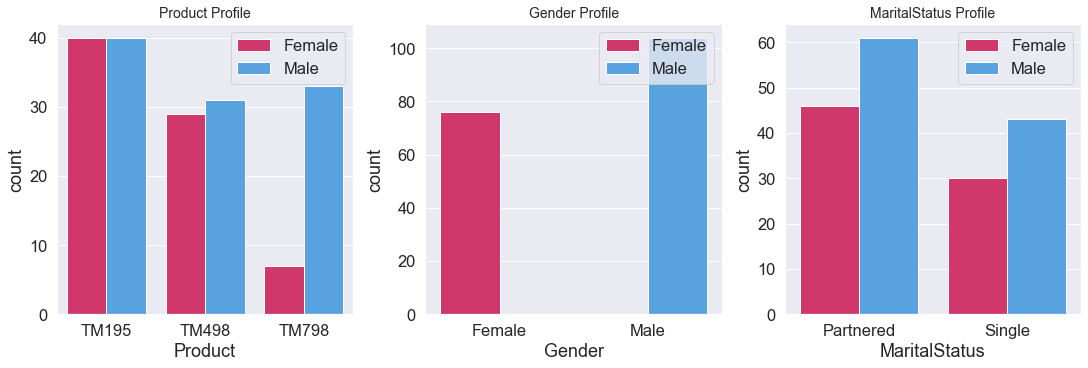

In [35]:
fig, axs = plt.subplots(
    nrows=1,                                                                # Number of rows of the grid
    ncols=3,                                                                # Number of columns of the grid.
    figsize=(15,5),                                                         # The size each figure
    constrained_layout=True)                                                # To avoid overlap between values

def plot_cartegorial_charts(ax, df_column_name):                            # Helperfunction, creates a count plot and puts it on the grid on the given axis
    ax = sns.countplot(                                                     # Create the count plot
        data=main_data,                                                     # Use the original data frame
        x=main_data[df_column_name],                                        # Use the column name passed in to get the series/values of that column
        hue="Gender",                                                       # Split the visual into Male and Female
        palette=gender_color_palette,                                       # Use gender specific colors (pink and blue)
        ax=ax)                                                              # Plot on the given axis 
    ax.set_title(df_column_name + ' Profile', fontsize=14)                  # Set the title of the chart. 
    ax.legend(loc='upper right')                                            # Put the legend of the chart on the top right.

categorial_data_column_names = ['Product', 'Gender', 'MaritalStatus']       # A list of categorial columns.
column_names_index = 0;                                                     # Index variable used to loop

for ax in axs.flat:                                                         # Go through every axis on the grid and plota chart on it.
    plot_cartegorial_charts(ax, categorial_data_column_names[column_names_index])
    column_names_index = column_names_index + 1

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea">2.2 Exploring Continous Variables</span>
    
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> Observations 1:
<ul>
    <li>Most of the customers are in their mid 20s and 30s.</li>
    <li>Most customers rate them selves on a fitnes score of 3.</li>
    <li>Most customers seem to be making around 40k and 60k in income.</li>
    <li>The average mile ran is around 100 Miles</li>
</ul>

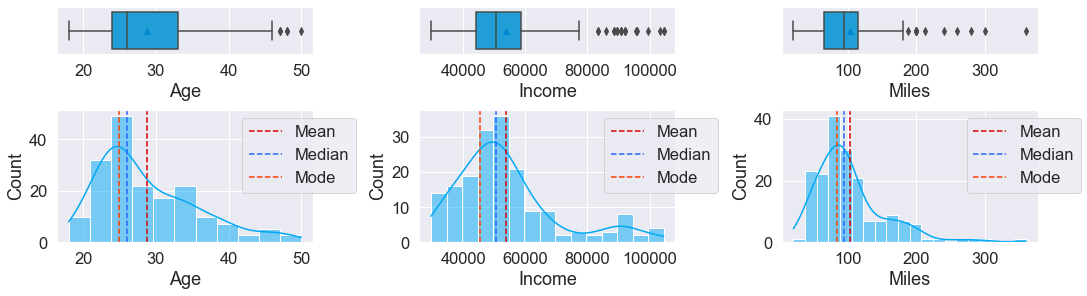

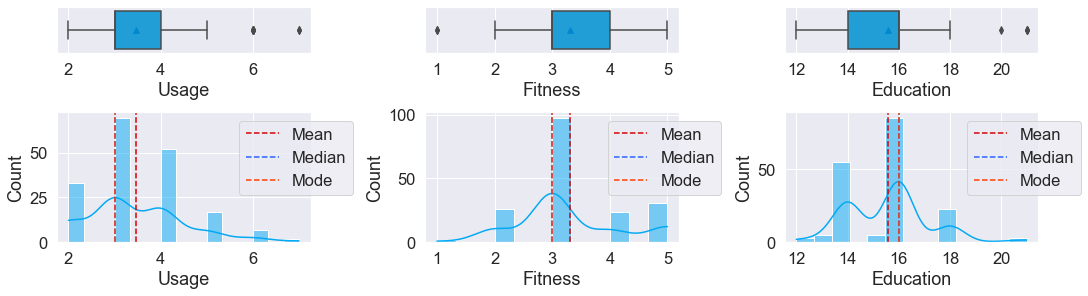

In [36]:
fig, (box, hist) = plt.subplots(
    nrows=2,                                                                # Number of rows of the grid
    ncols=3,                                                                # Number of columns of the grid.
    figsize=(15,4),       
            gridspec_kw={"height_ratios" : (0.25,0.7)},
    constrained_layout=True)                                                # To avoid overlap between values


def plot_distribution_chart(box_chart_ax, hist_chart_ax, df_column_name):   # Plot the probability density grap on the given axis
    
    sns.boxplot(
        data=main_data,
        x=main_data[df_column_name],
        showmeans=True,
        ax=box_chart_ax)
    
    sns.histplot(
        data=main_data,
        x=main_data[df_column_name],
        kde=True,
        ax=hist_chart_ax)
    
    hist_chart_ax.axvline(main_data[df_column_name].mean(),                 # Get the mean of the values in the given column and draw a vertical line that cuts the chart on the mean value 
               color=stats_colors['Mean'],                                  # Use on of the colors predefined on this notebook
               label='Mean',                                                # Set the label to be diplayed on the legend
               linestyle="dashed");                                         # Make the line have dashes
    
    hist_chart_ax.axvline(main_data[df_column_name].median(),               # Plot the median line on the chart.
               color=stats_colors['Median'],                                # Use on of the colors predefined on this notebook
               label='Median',                                              # Set the label to be diplayed on the legend
               linestyle="dashed");                                         # Make the line have dashes
    
    hist_chart_ax.axvline(main_data[df_column_name].mode()[0],              # Plot the mode line on the chart.
               color=stats_colors['Mode'],                                  # Use on of the colors predefined on this notebook 
               label='Mode',                                                # Set the label to be diplayed on the legend
               linestyle="dashed");                                         # Make the line have dashes
    
    hist_chart_ax.legend(bbox_to_anchor=(1.2, 1), loc='upper right')

column_names = ['Age', 'Income', 'Miles', 'Usage', 'Fitness', 'Education']

for count in range(3):
    plot_distribution_chart(box.flat[count], hist.flat[count], column_names[count])
    

fig, (box, hist) = plt.subplots(
    nrows=2,                                                                # Number of rows of the grid
    ncols=3,                                                                # Number of columns of the grid.
    figsize=(15,4),       
    gridspec_kw={"height_ratios" : (0.25,0.7)},
    constrained_layout=True) 

column_names = ['Usage', 'Fitness', 'Education']
for count in range(3):
    plot_distribution_chart(box.flat[count], hist.flat[count], column_names[count])

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> Observations 2 (Same as 1):
<ul>
    <li>Most of the customers are in their mid 20s and 30s.</li>
    <li>Most customers rate them selves on a fitnes score of 3.</li>
    <li>Most customers seem to be making around 40k and 60k in income.</li>
    <li>The average mile ran is around 100 Miles</li>
</ul>

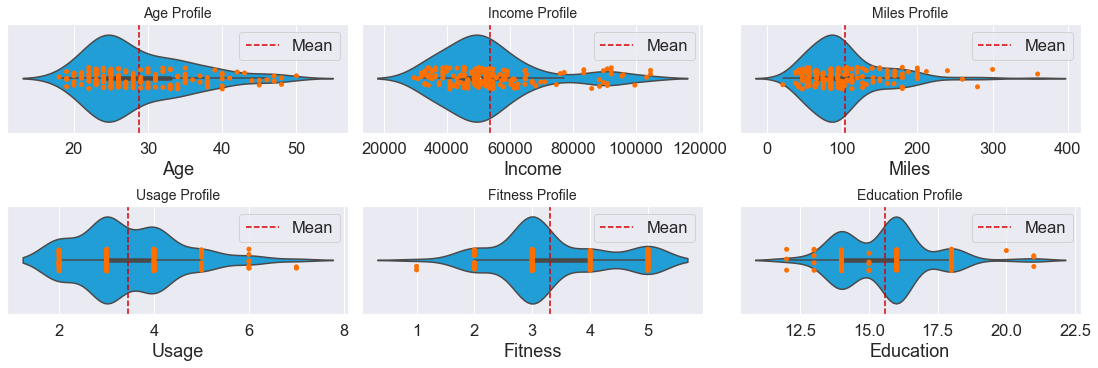

In [37]:
fig, axs = plt.subplots(
    nrows=2,                                                                # Number of rows of the grid
    ncols=3,                                                                # Number of columns of the grid.
    figsize=(15,5),                                                         # The size each figure
    constrained_layout=True)                                                # To avoid overlap between values

def plot_box_chart(ax, df_column_name):                                     # Helper function to plot the violin plot.
    ax = sns.violinplot(                                                    # Plot the violin chart
        x=df_column_name,                                                   # Set the input column name as the x-axis
        data=main_data,                                                     # Use the main data loaded on start of the notebook
        ax = ax,                                                            # plot the violin on the given grid axis
        kind="box")                                                         # Use boxplot
    
    sns.stripplot(x=main_data[df_column_name],                              # Plot the stripplot show were most of the data in the violin lies
                  ax = ax,                                                  # Plot the violin on the given grid axis
                  color=default_color_palette[1],                           # use one the note-book'spredefined colors for the dots
                  jitter=True)                                              # Allows stripplot to visualize number of datapoints for a given x-axis 
    
    ax.axvline(main_data[df_column_name].mean(),                            # Plot the mean on the same axis as the violinplot. 
               color=default_color_palette[3],                              # Use one of the notebook's predeined colors
               label='Mean',                                                # Set the label to display on the legend
               linestyle="dashed");                                         # set the line style to have dashes.

    ax.set_xlabel(df_column_name)                                           # Set the x-axis label of the chart.                                           
    ax.set_title(df_column_name + ' Profile', fontsize=14)                  # Set the title of the chart
    ax.legend(loc='upper right')                                            # Move the legend to the upper right of the chart

continuous_data_column_names = ['Age', 'Income', 'Miles', 'Usage', 'Fitness', 'Education']
count =0
for ax in axs.flat:
    plot_box_chart(ax, continuous_data_column_names[count])
    count = count + 1

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> Observations 3 (Comparing by Gender):
<ul>
    <li>Males tend use the products more than females.</li>
    <li>Males tend to run more miles than females.</li>
    <li>More males have a fitness score of 4-6 than females</li>
    <li>More males make more in income compared to females(might not be true since theres more males than females in the data</li>
    <li>Most of the customers are between ages 30 and 40</li>
</ul>

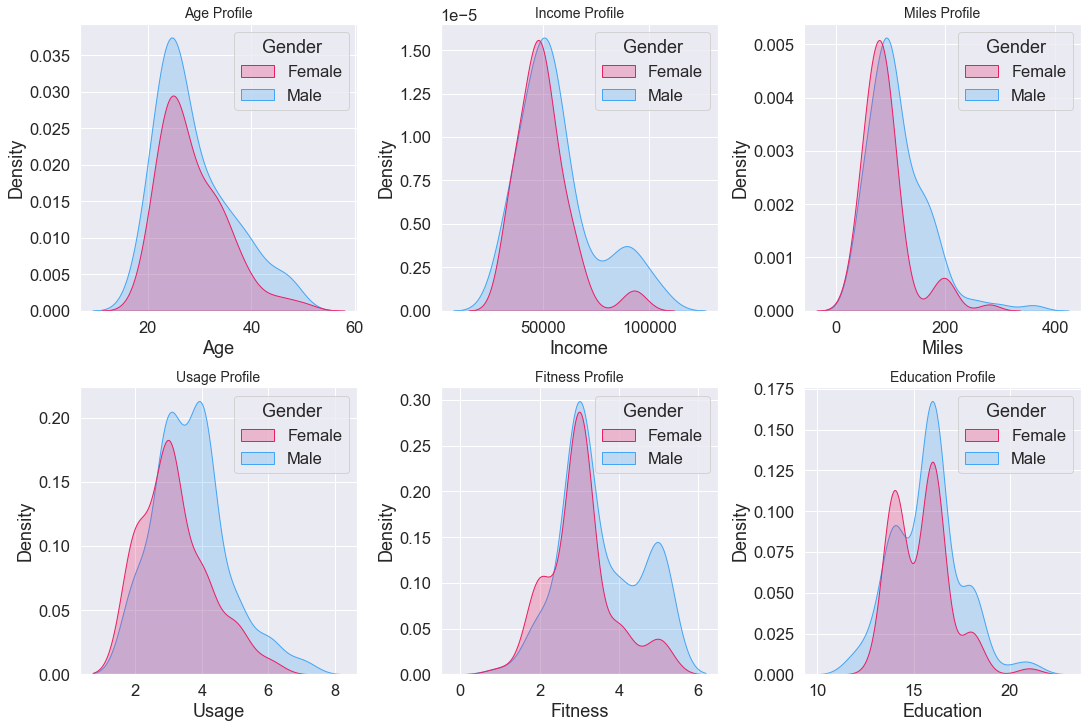

In [39]:
fig, axs = plt.subplots(
    nrows=2,                                                                # Number of rows of the grid
    ncols=3,                                                                # Number of columns of the grid.
    figsize=(15,10),                                                        # The size each figure
    constrained_layout=True)                                                # To avoid overlap between values

def plot_distribution_chart(ax, df_column_name):
    ax = sns.kdeplot(main_data[df_column_name],
                     ax=ax,                                                 # Plot the kds chart on the given axis
                     palette=gender_color_palette,                          # Use gender specific colors defined at the start of this notebook
                     hue=main_data["Gender"],                               # Split the chart by gender
                     shade=True);                                           # Shaded the area below the curve
    
    ax.set_xlabel(df_column_name)                                           # Set the x-axis label of the chart.                                           
    ax.set_title(df_column_name + ' Profile', fontsize=14)                  # Set the title of the chart

    
continuous_data_column_names = ['Age', 'Income', 'Miles', 'Usage', 'Fitness', 'Education']
count =0
for ax in axs.flat:
    plot_distribution_chart(ax, continuous_data_column_names[count])
    count = count + 1

####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> 3. Multivariate Data Analysis:

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea">3.1 Overview

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> Observations (Comparing by Gender):
<ul>
    <li>The older the customer, the more them seem to be educated</li>
    <li>The average income for both male and female seem to be around 50k both being higher for older customers.</li>
    <li>There isnt that much correlation between the customer's age fitness (for both female and male)</li>
    <li>Theres a high correlation between high education and high income.</li>
    <li>Customers who want to use the machines more often tend to use them longer.</li>
    <li>Fitness tends to increase with usage.</li>
    <li>Males between ages 20 and 40 tend to earn (Income) more than females in the same age range.</li>
    <li>Males between ages 20 and 40 tend to run more miles than females in the same age range.</li>
    <li>Males between ages 20 and 40 tend to use the product more than females in the same age range.</li>
    <li>Males tend to run more than females with the same level of education.</li>
    <li>Theres positive corralation between income and usage for both males and females</li>
</ul>

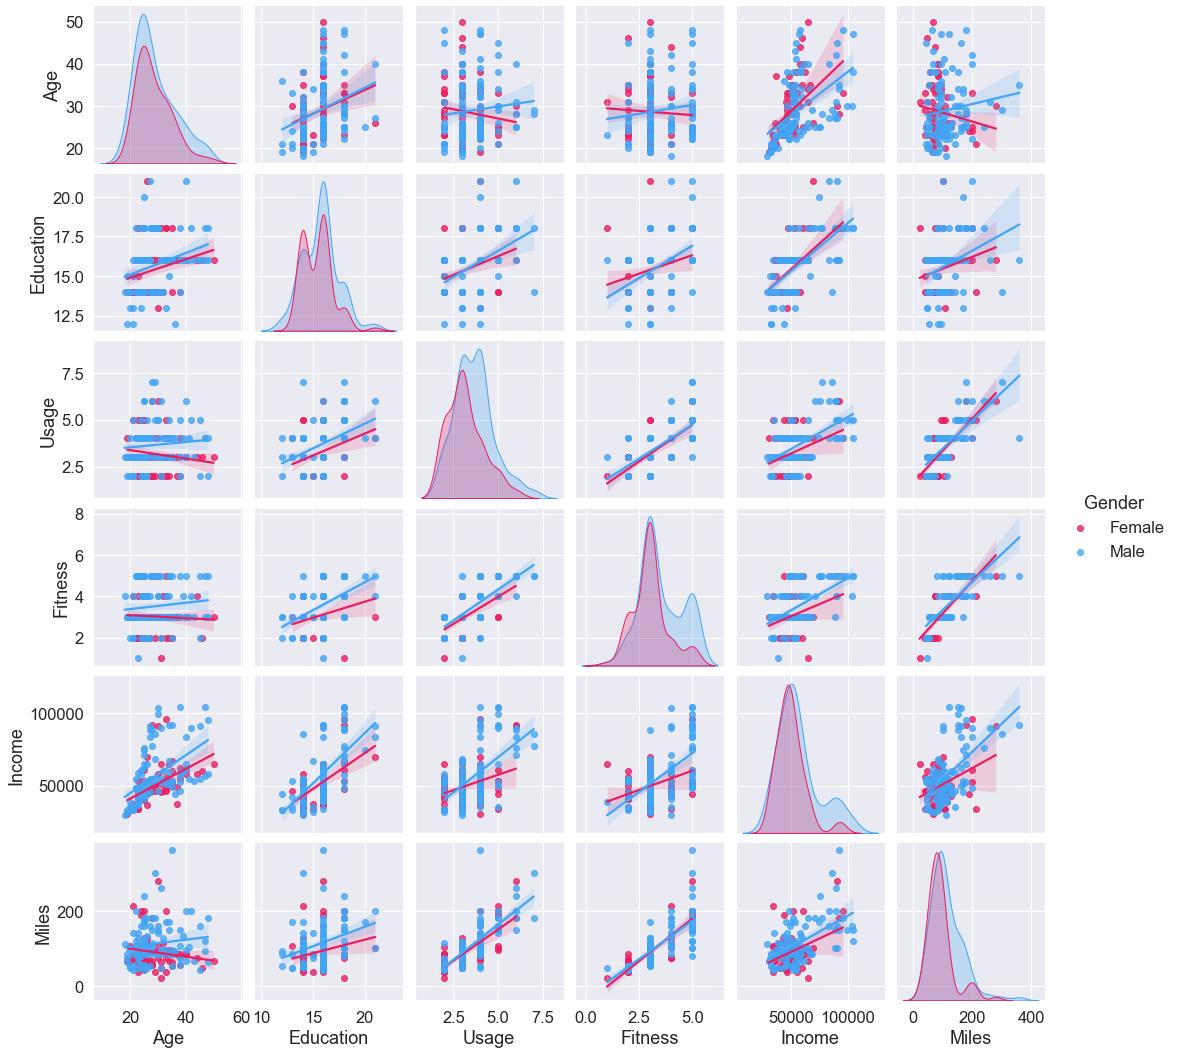

In [40]:
sns.pairplot(data=main_data, hue="Gender", kind="reg", palette=gender_color_palette);

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> Observations (Comparing by Gender):
<ul>
    <li>Product TM798 seesm to be more porpular amongest the higher educated, high earners, highly fit</li>
</ul>

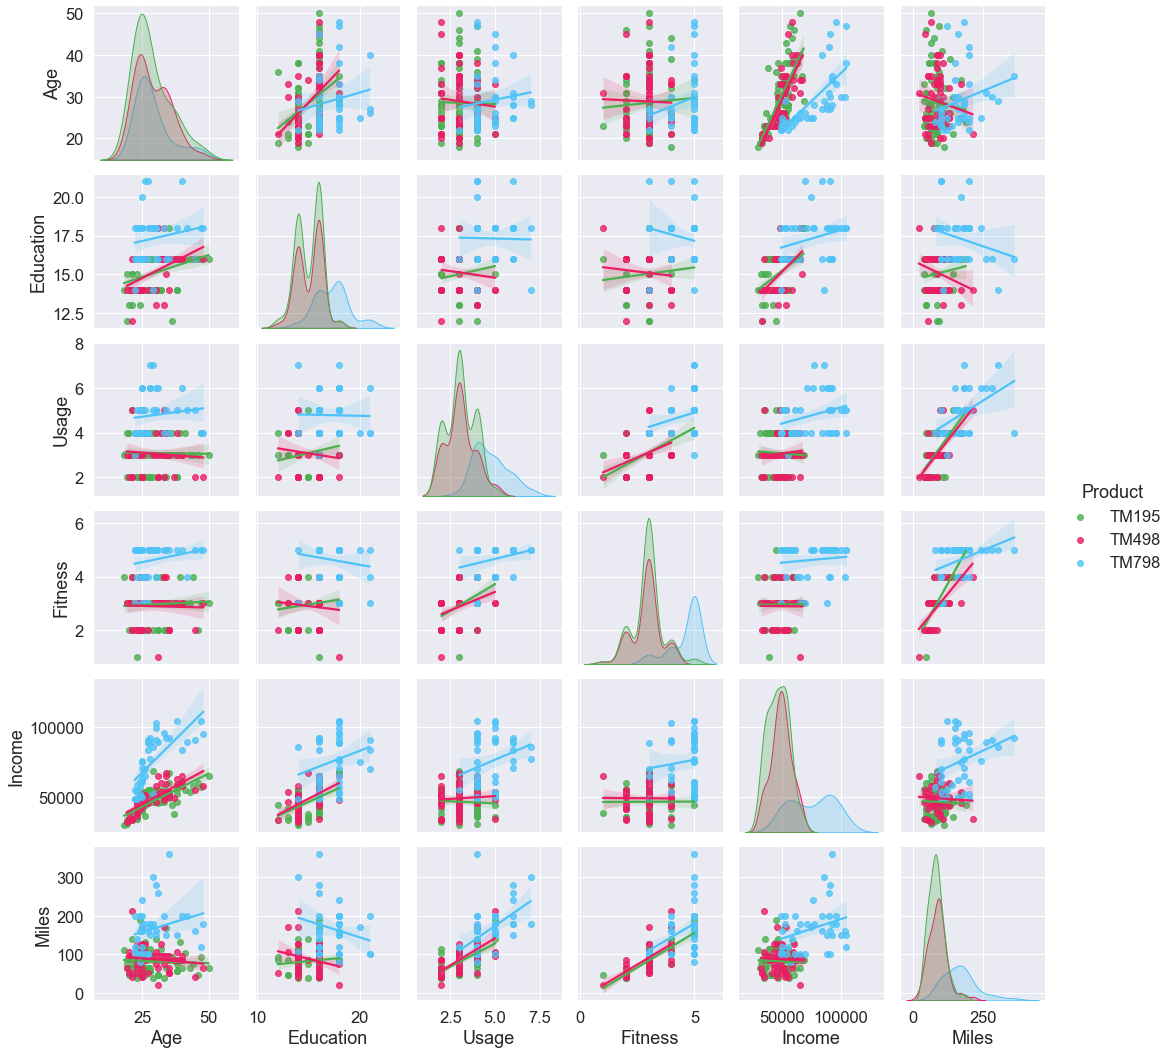

In [42]:
sns.pairplot(data=main_data, hue="Product", kind="reg", palette=product_color_palette);

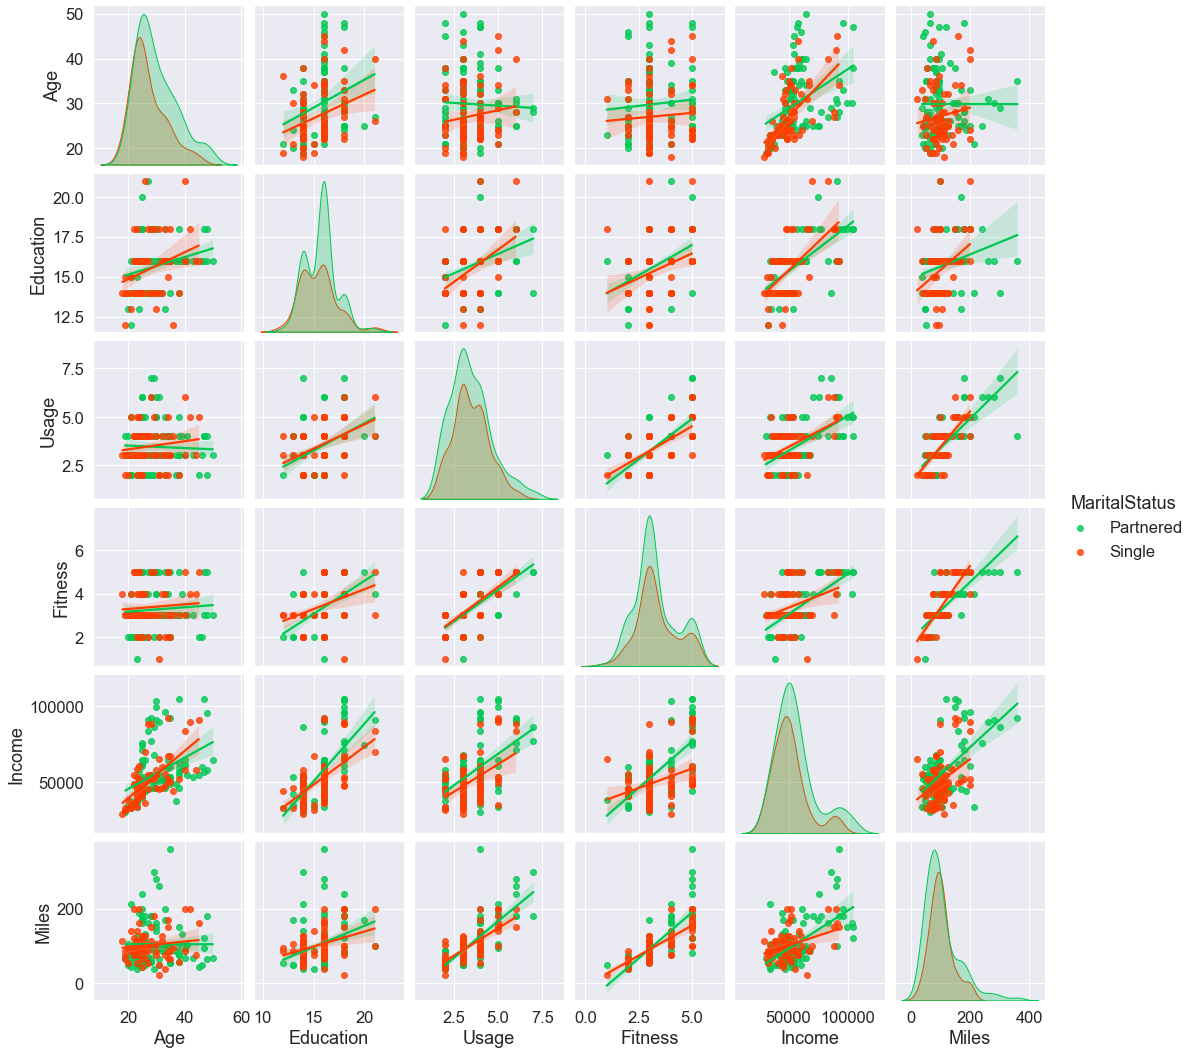

In [43]:
sns.pairplot(data=main_data, hue="MaritalStatus", kind="reg", palette=maritalcolorstatus_color_palette);

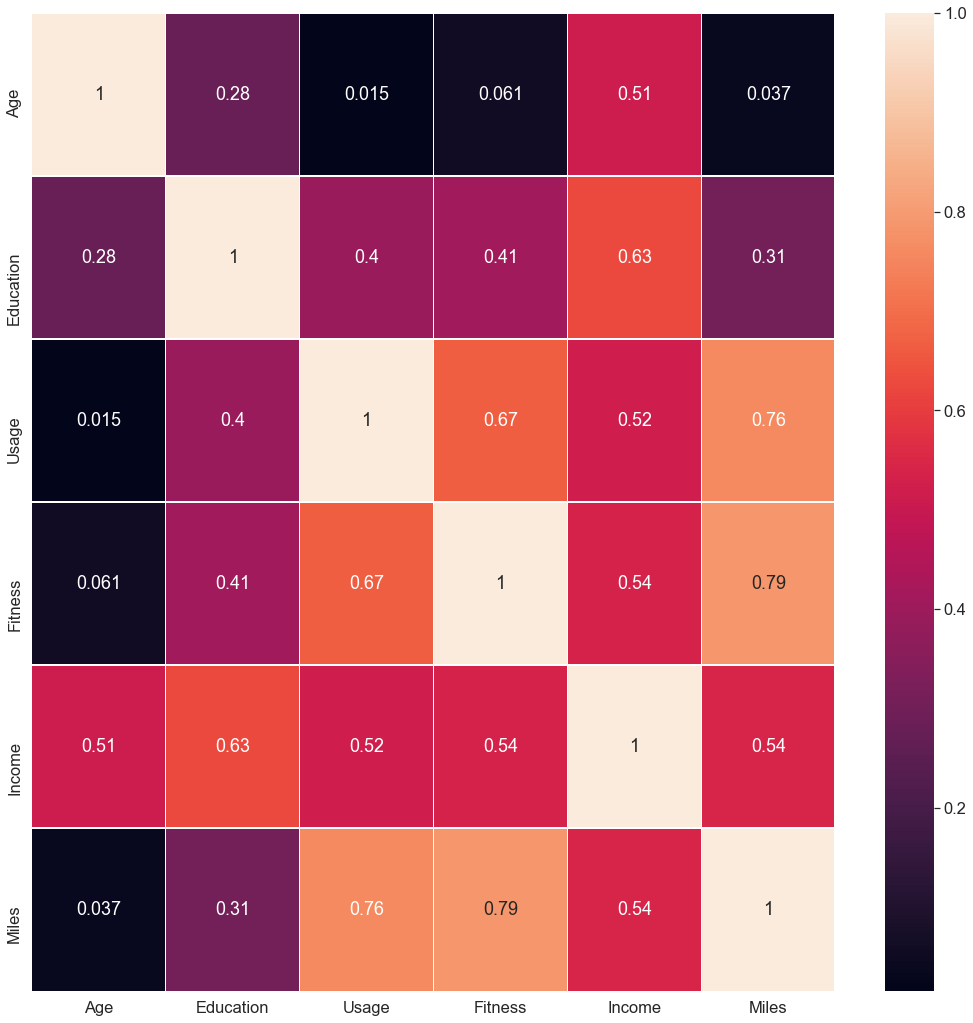

In [44]:
fig, ax = plt.subplots(figsize=(18,18)) 
sns.heatmap(data=main_data.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> Observations 2 (Product Drill):
<ul>
    <li>Here we see that morepeople in their 20s to 30s want to use TM789. This agerange is where most of the cusomter sample lies.</li>
</ul>

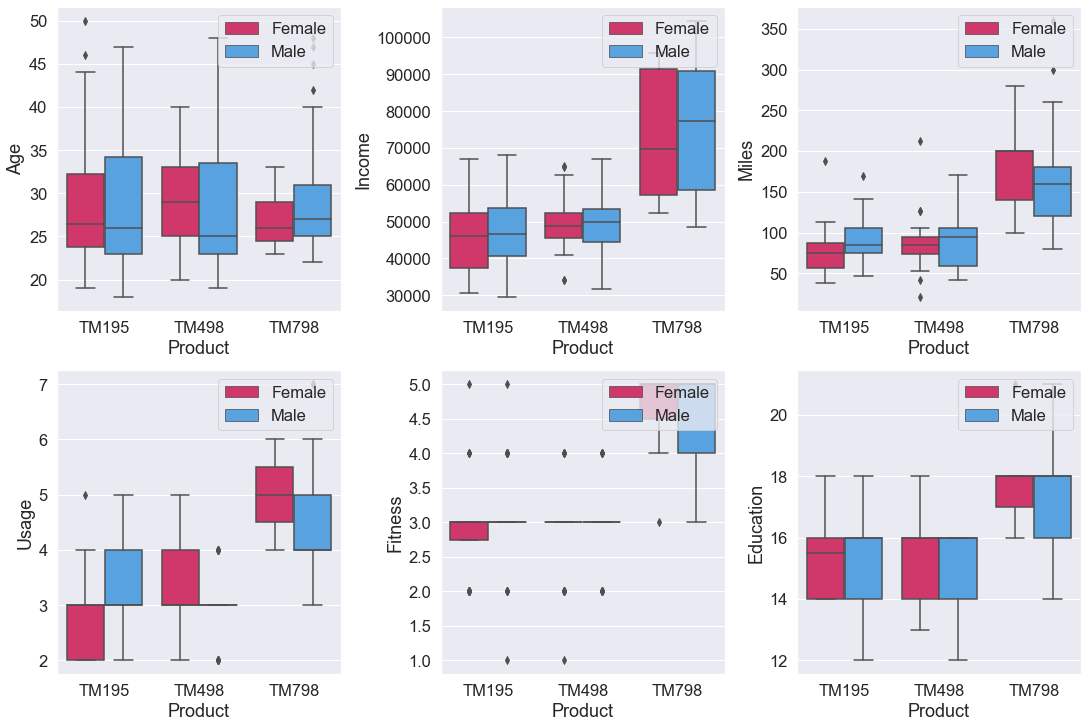

In [46]:
fig, axs = plt.subplots(
    nrows=2,                                                                # Number of rows of the grid
    ncols=3,                                                                # Number of columns of the grid.
    figsize=(15,10),                                                        # The size each figure
    constrained_layout=True)                                                # To avoid overlap between values

def plot_product_comparison_boxplot(ax, df_column_name):
    
    ax = sns.boxplot(data=main_data,
                     x="Product",
                     y=df_column_name,
                     hue="Gender",
                     palette=gender_color_palette,
                     ax=ax);
    ax.legend(loc='upper right')                                            # Move the legend to the upper right of the chart
    
continuous_data_column_names = ['Age', 'Income', 'Miles', 'Usage', 'Fitness', 'Education']
count =0

for ax in axs.flat:
    plot_product_comparison_boxplot(ax, continuous_data_column_names[count])
    count = count + 1

plt.legend(loc='upper right')
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> Observations 2 (Product Drill):
<ul>
    <li>Married men seem to be earning higher than married women and non married customers</li>
</ul>

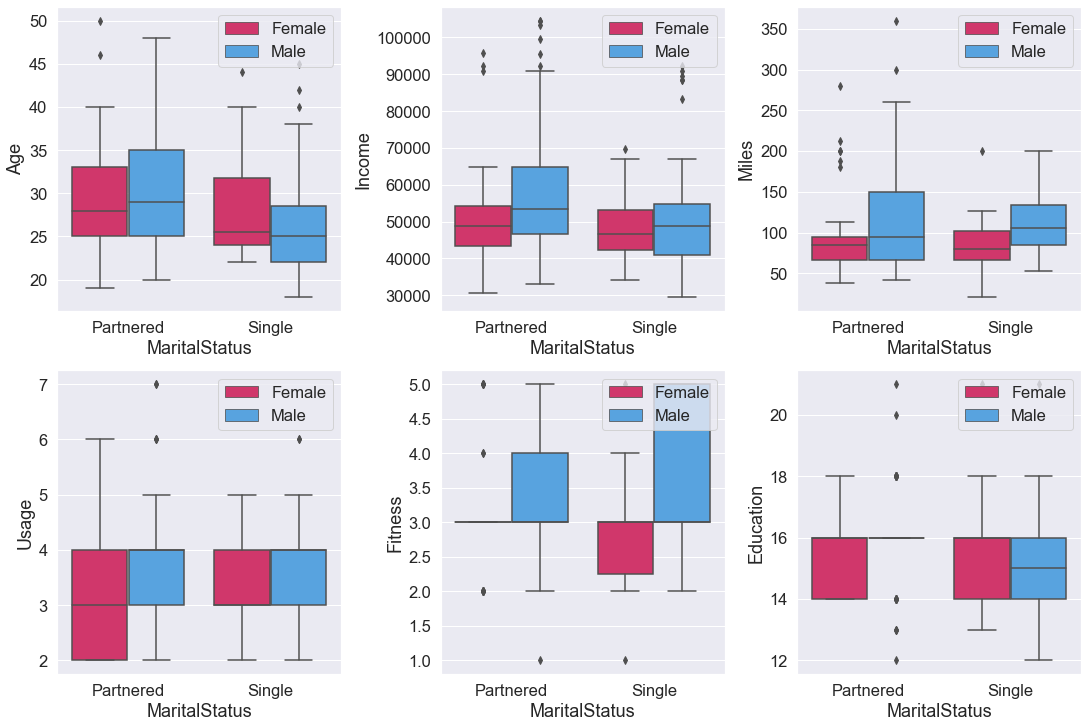

In [47]:
fig, axs = plt.subplots(
    nrows=2,                                                                # Number of rows of the grid
    ncols=3,                                                                # Number of columns of the grid.
    figsize=(15,10),                                                        # The size each figure
    constrained_layout=True)                                                # To avoid overlap between values

def plot_marital_status_comparison_boxplot(ax, df_column_name):
    
    ax = sns.boxplot(data=main_data,
                     x="MaritalStatus",
                     y=df_column_name,
                     hue="Gender",
                     palette=gender_color_palette,
                     ax=ax);
    ax.legend(loc='upper right')                                            # Move the legend to the upper right of the chart

continuous_data_column_names = ['Age', 'Income', 'Miles', 'Usage', 'Fitness', 'Education']
count =0

for ax in axs.flat:
    plot_marital_status_comparison_boxplot(ax, continuous_data_column_names[count])
    count = count + 1

plt.legend(loc='upper right')
plt.show()

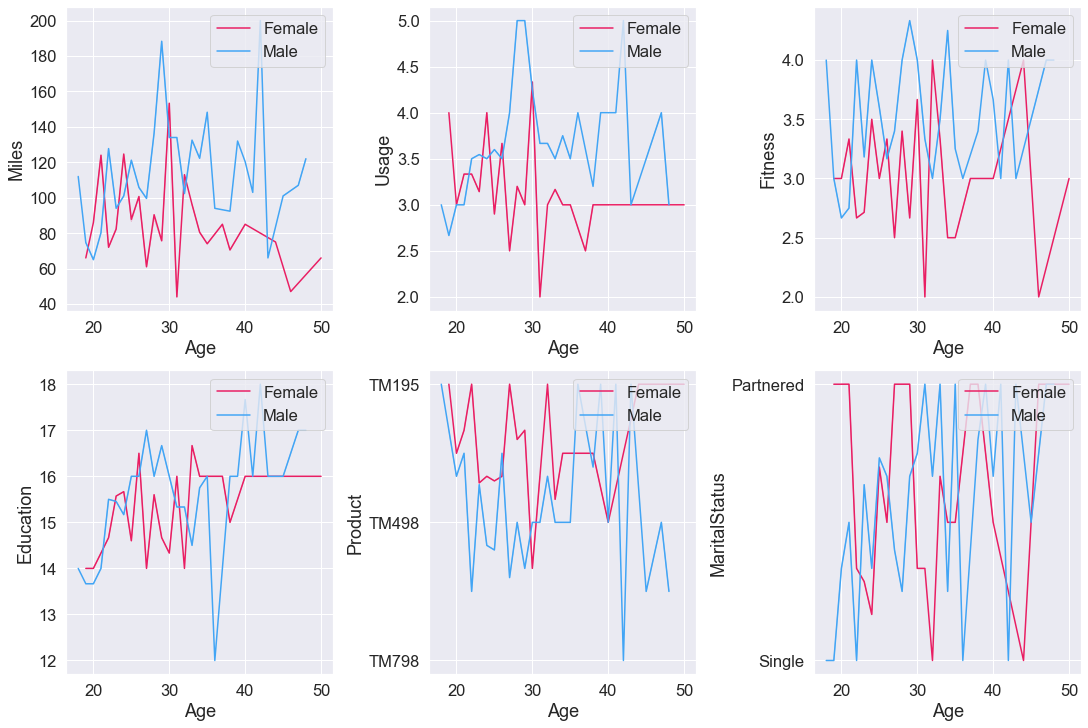

In [48]:
fig, axs = plt.subplots(
    nrows=2,                                                                # Number of rows of the grid
    ncols=3,                                                                # Number of columns of the grid.
    figsize=(15,10),                                                        # The size each figure
    constrained_layout=True)                                                # To avoid overlap between values

def plot_marital_status_comparison_boxplot(ax, df_column_name):
    
    ax = sns.lineplot(data=main_data,
                     x=main_data['Age'],
                     y=main_data[df_column_name],
                     hue="Gender",
                     palette=gender_color_palette,
                     ci=0,
                     ax=ax);
    ax.legend(loc='upper right')                                            # Move the legend to the upper right of the chart
    
continuous_data_column_names = ['Miles', 'Usage', 'Fitness', 'Education', 'Product', 'MaritalStatus']
count =0

for ax in axs.flat:
    plot_marital_status_comparison_boxplot(ax, continuous_data_column_names[count])
    count = count + 1

plt.legend(loc='upper right')
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea">3.2 Group Data With Regards to Product

In [49]:
main_data[main_data['Product']=='TM195'].describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,80,80.000000,80,80.000000,80,80.000000,80.00000,80.00000,80.000000
unique,1,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Female,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,40,NaN,48,NaN,NaN,NaN,NaN
mean,NaN,28.550000,NaN,15.037500,NaN,3.087500,2.96250,46418.02500,82.787500
std,NaN,7.221452,NaN,1.216383,NaN,0.782624,0.66454,9075.78319,28.874102
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.00000,29562.00000,38.000000
25%,NaN,23.000000,NaN,14.000000,NaN,3.000000,3.00000,38658.00000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.00000,46617.00000,85.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,3.00000,53439.00000,94.000000


In [50]:
main_data[main_data['Product']=='TM498'].describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,60,60.000000,60,60.000000,60,60.000000,60.00000,60.000000,60.000000
unique,1,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM498,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,60,NaN,31,NaN,36,NaN,NaN,NaN,NaN
mean,NaN,28.900000,NaN,15.116667,NaN,3.066667,2.90000,48973.650000,87.933333
std,NaN,6.645248,NaN,1.222552,NaN,0.799717,0.62977,8653.989388,33.263135
min,NaN,19.000000,NaN,12.000000,NaN,2.000000,1.00000,31836.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.00000,44911.500000,64.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.00000,49459.500000,85.000000
75%,NaN,33.250000,NaN,16.000000,NaN,3.250000,3.00000,53439.000000,106.000000


In [51]:
main_data[main_data['Product']=='TM798'].describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,40,40.000000,40,40.000000,40,40.000000,40.000000,40.00000,40.000000
unique,1,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM798,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,40,NaN,33,NaN,23,NaN,NaN,NaN,NaN
mean,NaN,29.100000,NaN,17.325000,NaN,4.775000,4.625000,75441.57500,166.900000
std,NaN,6.971738,NaN,1.639066,NaN,0.946993,0.667467,18505.83672,60.066544
min,NaN,22.000000,NaN,14.000000,NaN,3.000000,3.000000,48556.00000,80.000000
25%,NaN,24.750000,NaN,16.000000,NaN,4.000000,4.000000,58204.75000,120.000000
50%,NaN,27.000000,NaN,18.000000,NaN,5.000000,5.000000,76568.50000,160.000000
75%,NaN,30.250000,NaN,18.000000,NaN,5.000000,5.000000,90886.00000,200.000000


####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> 4. Summary and Recommendations:
   
<p align="center">
Product TM798 seems be more used and and the business should consider stocking moreto avoid discouraging customers by having them wait for a vacant machine if they are all occupied.
</p>

In [53]:
os.system('jupyter nbconvert --to markdown --output "README.md" "DataExplorationAssignment.ipynb"')

0